In [58]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../Pyber/data/city_data.csv"
ride_data_to_load = "../Pyber/data/ride_data.csv"

# Read the City and Ride Data

CityData_df=pd.read_csv(city_data_to_load)
RideData_df=pd.read_csv(ride_data_to_load)

#CityData_df [city, drive_count, type]
#RideData_df [city, date, fare, ride_id]

# Combine the data into a single dataset

CityRide_df = pd.merge(CityData_df, RideData_df,
                                 how='outer', on='city')

# Display the data table for preview

CityRide_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [59]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

citygroup=CityRide_df.groupby("city")
Avg_Fare=citygroup["fare"].mean()

Total_Rides=CityRide_df["city"].value_counts()

Clean_Drivers=CityRide_df.drop_duplicates(subset="city")
Driversdf=pd.DataFrame(Clean_Drivers)
Driversdf=Driversdf.set_index("city")
TotalDrivers=Driversdf["driver_count"]

City_Type=Driversdf["type"]


bubble_dict={"Total Rides per City":Total_Rides,
      "Average Fare per City":Avg_Fare,
       "Total Number of Drivers Per City":TotalDrivers,
       "City Type":City_Type}

bubble_df=pd.DataFrame(bubble_dict)
bubble_df.head(40)

bubble_df.style.format("${:.2f}", subset="Average Fare per City")

,Total Rides per City,Average Fare per City,Total Number of Drivers Per City,City Type
Amandaburgh,18,$24.64,12,Urban
Barajasview,22,$25.33,26,Urban
Barronchester,16,$36.42,11,Suburban
Bethanyland,18,$32.96,22,Suburban
Bradshawfurt,10,$40.06,7,Rural
Brandonfort,19,$35.44,10,Suburban
Carriemouth,27,$28.31,52,Urban
Christopherfurt,27,$24.50,41,Urban
Colemanland,22,$30.89,23,Suburban
Davidfurt,17,$32.00,23,Suburban


## Bubble Plot of Ride Sharing Data

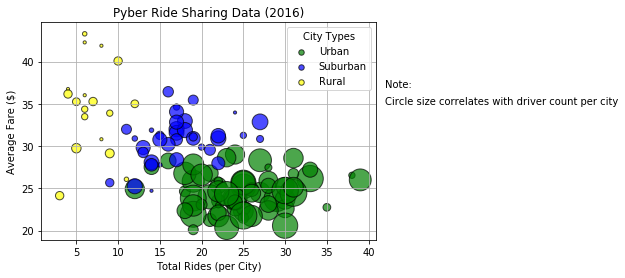

In [60]:
# Obtain the x and y coordinates for each of the three city types

Urban_df = bubble_df.loc[bubble_df["City Type"] == "Urban"]
Rural_df = bubble_df.loc[bubble_df["City Type"] == "Rural"]
Suburban_df = bubble_df.loc[bubble_df["City Type"] == "Suburban"]

# X Values
Urban_ride_data = Urban_df["Total Rides per City"]
Rural_ride_data = Rural_df["Total Rides per City"]
Suburban_ride_data = Suburban_df["Total Rides per City"]
# Y values
Urban_fare_data = Urban_df["Average Fare per City"]
Rural_fare_data = Rural_df["Average Fare per City"]
Suburban_fare_data = Suburban_df["Average Fare per City"]

#Z Values
Urban_driver_data = Urban_df["Total Number of Drivers Per City"]
Rural_driver_data = Rural_df["Total Number of Drivers Per City"]
Suburban_driver_data = Suburban_df["Total Number of Drivers Per City"]


# Build the scatter plots for each city types

Urban_plot=plt.scatter(Urban_ride_data, Urban_fare_data, s=Urban_driver_data*10, marker="o", 
                       facecolors="green",edgecolors="black",  alpha=.7, label="Urban")

Suburban_plot=plt.scatter(Suburban_ride_data, Suburban_fare_data, s=Suburban_driver_data*10, marker="o", 
                          facecolors="blue", edgecolors="black", alpha=.7, label="Suburban")

Rural_plot=plt.scatter(Rural_ride_data, Rural_fare_data, s=Rural_driver_data*10,marker="o", 
                       facecolors="yellow",edgecolors="black", alpha=.7, label="Rural")



# Incorporate the other graph properties

plt.ylim(20,40)
plt.xlim(5,40)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

plt.axis('auto')


# Create a legend

leg=plt.legend(title="City Types", scatterpoints=1)
leg.legendHandles[0]._sizes=[30]
leg.legendHandles[1]._sizes=[30]
leg.legendHandles[2]._sizes=[30]


# Incorporate a text label regarding circle size

plt.text(42, 37, "Note:")
plt.text(42, 35 ,"Circle size correlates with driver count per city")

# Save Figure

plt.savefig("../Pyber/Bubble-ride-share.png")

In [61]:
# Show plot
plt.show()

## Total Fares by City Type

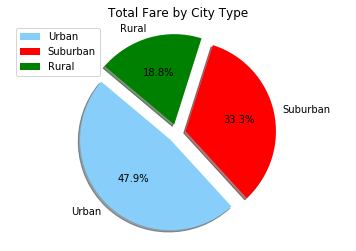

In [62]:
# Calculate Type Percents

#sum of fares if urban/sum all fares

Total_Fares=bubble_df["Average Fare per City"].sum()
Total_Fares

Urban_Total_Fares=Urban_df["Average Fare per City"].sum()
Suburban_Total_Fares=Suburban_df["Average Fare per City"].sum()
Rural_Total_Fares=Rural_df["Average Fare per City"].sum()

percent_urban=(Urban_Total_Fares/Total_Fares)*100
percent_suburban=(Suburban_Total_Fares/Total_Fares)*100
percent_rural=(Rural_Total_Fares/Total_Fares)*100


percent_fares={"Total Urban Fare Percent":percent_urban,
              "Total Suburban Fare Percent": percent_suburban,
              "Total Rural Fare Percent": percent_rural}

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percent_urban, percent_suburban, percent_rural]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red", "green"]

explode = (0.1, 0.1, 0.1)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Fare by City Type")
plt.legend()

# Save Figure

plt.savefig("../Pyber/PieTotalFarebyCityType.png")

In [63]:
# Show Figure
plt.show()

## Total Rides by City Type

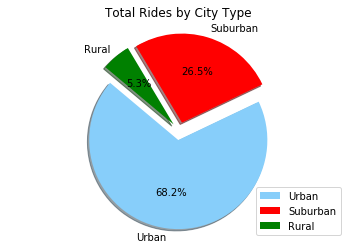

In [64]:
# Calculate Ride Percents

Total_Rides=bubble_df["Total Rides per City"].sum()
Total_Rides

Urban_Total_Rides=Urban_df["Total Rides per City"].sum()
Suburban_Total_Rides=Suburban_df["Total Rides per City"].sum()
Rural_Total_Rides=Rural_df["Total Rides per City"].sum()

Rpercent_urban=(Urban_Total_Rides/Total_Rides)*100
Rpercent_suburban=(Suburban_Total_Rides/Total_Rides)*100
Rpercent_rural=(Rural_Total_Rides/Total_Rides)*100


percent_fares={"Total Urban Ride Percent":Rpercent_urban,
              "Total Suburban Ride Percent": Rpercent_suburban,
              "Total Rural Ride Percent": Rpercent_rural}


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [Rpercent_urban, Rpercent_suburban, Rpercent_rural]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red", "green"]

explode = (0.1, 0.1, 0.1)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Rides by City Type")
plt.legend(loc=4)

# Save Figure

plt.savefig("../Pyber/PieTotalRidesbyCityType.png")

In [65]:
# Show Figure
plt.show()

## Total Drivers by City Type

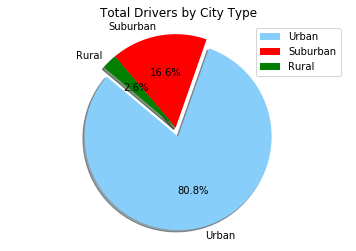

In [66]:
# Calculate Driver Percents

Total_Drivers=bubble_df["Total Number of Drivers Per City"].sum()
Total_Drivers

Urban_Total_Drivers=Urban_df["Total Number of Drivers Per City"].sum()
Suburban_Total_Drivers=Suburban_df["Total Number of Drivers Per City"].sum()
Rural_Total_Drivers=Rural_df["Total Number of Drivers Per City"].sum()

Dpercent_urban=(Urban_Total_Drivers/Total_Drivers)*100
Dpercent_suburban=(Suburban_Total_Drivers/Total_Drivers)*100
Dpercent_rural=(Rural_Total_Drivers/Total_Drivers)*100


percent_fares={"Total Urban Driver Percent":Dpercent_urban,
              "Total Suburban Driver Percent": Dpercent_suburban,
              "Total Rural Driver Percent": Dpercent_rural}


# Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [Dpercent_urban, Dpercent_suburban, Dpercent_rural]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red", "green"]

explode = (0.1, 0.0, 0.0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Drivers by City Type")
plt.legend(loc=0)


# Save Figure

plt.savefig("../Pyber/PieTotalDriversbyCityType.png")

In [67]:
# Show Figure
plt.show()